<a href="https://colab.research.google.com/github/projects-with-sakshi/Sweet_dishes_detector/blob/main/Sweet_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from google.colab import auth
auth.authenticate_user()

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Datasets

In [40]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Data Preprocessing

In [58]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Sweet_dishes dataset/Train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=9,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

Found 220 files belonging to 9 classes.


## Validation Image Preprocessing

In [59]:
Validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Sweet_dishes dataset/Validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=7,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )


Found 63 files belonging to 9 classes.


# Building Model


In [60]:
cnn=tf.keras.models.Sequential()

# Building Convolution Layer

In [61]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [62]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [63]:
cnn.add(tf.keras.layers.Flatten())

In [64]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [48]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [65]:
cnn.add(tf.keras.layers.Dropout(0.5))      #To avoid overfitting

In [66]:
# This is our output layer
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

# Compiling and Training Phase


In [67]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [69]:
training_history = cnn.fit(x=training_set,validation_data=Validation_set,epochs=32)

Epoch 1/32
25/25 [==============================] - 9s 314ms/step - loss: 21.4643 - accuracy: 0.1182 - val_loss: 2.1808 - val_accuracy: 0.1587
Epoch 2/32
25/25 [==============================] - 7s 270ms/step - loss: 2.1003 - accuracy: 0.2500 - val_loss: 2.0144 - val_accuracy: 0.1270
Epoch 3/32
25/25 [==============================] - 6s 230ms/step - loss: 2.0179 - accuracy: 0.2591 - val_loss: 1.9185 - val_accuracy: 0.1429
Epoch 4/32
25/25 [==============================] - 6s 238ms/step - loss: 1.8794 - accuracy: 0.3045 - val_loss: 1.6237 - val_accuracy: 0.3810
Epoch 5/32
25/25 [==============================] - 7s 282ms/step - loss: 1.8224 - accuracy: 0.3455 - val_loss: 2.0421 - val_accuracy: 0.2540
Epoch 6/32
25/25 [==============================] - 6s 228ms/step - loss: 2.0103 - accuracy: 0.3227 - val_loss: 1.9005 - val_accuracy: 0.2540
Epoch 7/32
25/25 [==============================] - 8s 294ms/step - loss: 1.8657 - accuracy: 0.3591 - val_loss: 1.8883 - val_accuracy: 0.2857
Epoch

In [70]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

25/25 [==============================] - 2s 52ms/step - loss: 0.3162 - accuracy: 0.8136
Training accuracy: 0.8136363625526428


In [71]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(Validation_set)
print('Validation accuracy:', val_acc)

9/9 [==============================] - 1s 33ms/step - loss: 0.1783 - accuracy: 0.9365
Validation accuracy: 0.9365079402923584


# Saving Model

In [72]:
cnn.save('trainedmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
training_history.history

{'loss': [21.464313507080078,
  2.100348711013794,
  2.0178937911987305,
  1.8793598413467407,
  1.8223800659179688,
  2.0103487968444824,
  1.8657448291778564,
  1.8023608922958374,
  1.4942761659622192,
  1.395397663116455,
  1.3230581283569336,
  1.230407476425171,
  1.1563795804977417,
  1.057839035987854,
  1.139095425605774,
  1.2193994522094727,
  0.8552210927009583,
  0.7650786638259888,
  0.7207196354866028,
  0.6349284648895264,
  0.7004135251045227,
  0.6602482795715332,
  0.5632562637329102,
  0.5409949421882629,
  0.5261259078979492,
  0.6522436141967773,
  0.6479499340057373,
  0.44093263149261475,
  0.45952513813972473,
  0.4324450194835663,
  0.4193181097507477,
  0.383205384016037],
 'accuracy': [0.11818181723356247,
  0.25,
  0.2590909004211426,
  0.30454546213150024,
  0.34545454382896423,
  0.3227272629737854,
  0.3590908944606781,
  0.40909090638160706,
  0.47727271914482117,
  0.44545453786849976,
  0.5272727012634277,
  0.5409091114997864,
  0.550000011920929,
  

In [74]:
#Recording history
import json
with open('training_hist.json','w')as f:
  json.dump(training_history.history,f)

In [75]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating accuracy of Model Achieved on Validation set

In [76]:
print("Validation set accuracy : {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy : 93.65079402923584 %


# Accuracy Visualisation

# Training Visualisation

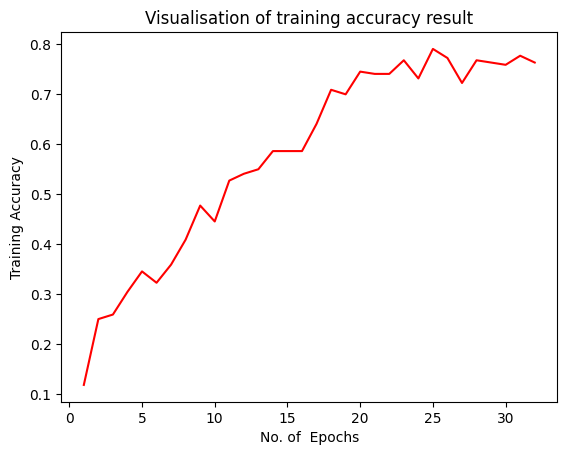

In [77]:
epochs=[i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of  Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualisation of training accuracy result')
plt.show()

# Validation Accuracy

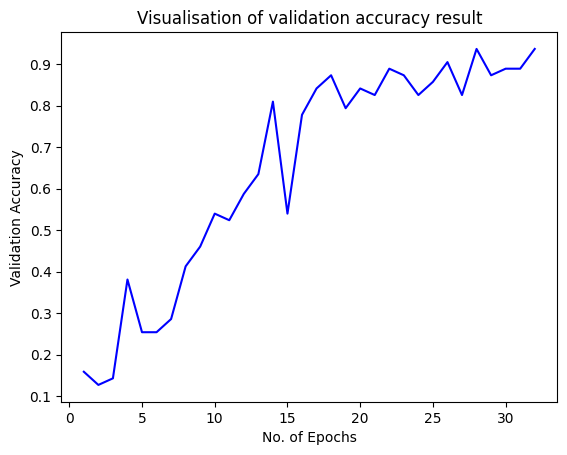

In [78]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualisation of validation accuracy result')
plt.show()

# Test Set Evaluation

In [79]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Sweet_dishes dataset/Test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

Found 63 files belonging to 9 classes.


In [80]:
test_loss,test_accuracy = cnn.evaluate(test_set)

2/2 [==============================] - 6s 121ms/step - loss: 0.1783 - accuracy: 0.9365
